In [1]:
import matplotlib.pylab as pl
%matplotlib inline

import cPickle as pickle

## experiment settings
### network structure
(((2, 2), 64, (2, 2)),) \* 2 + (((2, 2), 32, (1, 1), (1, 1)),) \* layers<br>
format: (kernel_shape, kernel_number, [stride, [pad]])<br>
layers ranges from 1 to 10
### hyperparameters
batch size: 128<br>
epochs: 50<br>
initialization: MSRA PReLU (lower = 0, upper = 1) 
learning rate: 0.001<br>
learning rate decay: none<br>
optimizer: Adam<br>
regularization: none<br>
test data: 10000 images<br>
training data: 40000 images<br>
validation data: 10000 images<br>

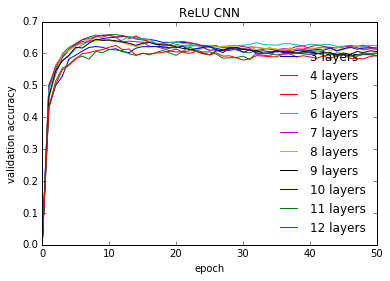

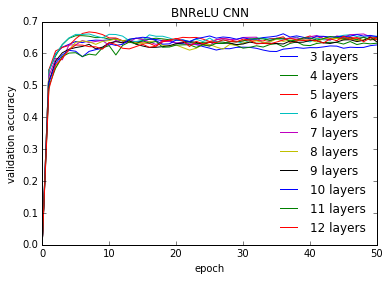

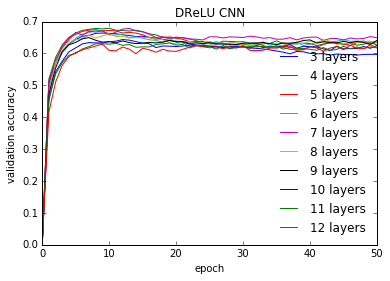

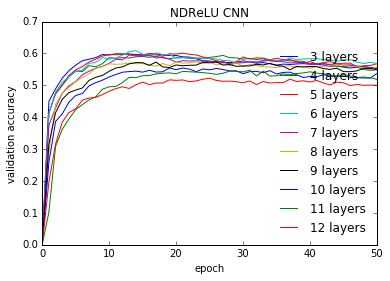

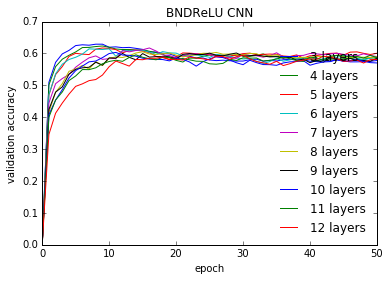

In [2]:
minimum_depth = 3
maximum_depth = 12
LENGTH = 100
each_depth = [{} for i in range(minimum_depth, maximum_depth + 1)]
optimizer_settings = {
    'lr'                : 0.001,
    'lr_decay_interval' : 1,
    'lr_decay_factor'   : 1.0,
    'optimizer'         : 'Adam',
    'weight_decay'      : 0
}

activations = ('ReLU', 'BNReLU', 'DReLU', 'NDReLU', 'BNDReLU')
for activation in activations:
    pl.figure()
    pl.xlabel('epoch')
    pl.ylabel('validation accuracy')
    pl.title('%s CNN' % activation)
    for depth in range(minimum_depth, maximum_depth + 1):
        path = 'models/CIFAR-10-%d-layer-no-pooling-CNN-%s-%s-history' % (depth, activation, optimizer_settings)
        history= pickle.load(open(path, 'rb'))
        each_depth[depth - minimum_depth].update({activation : history})
        pl.plot(range(len(history)), history, label='%d layers' % depth)
    pl.legend(framealpha=0, loc='lower right')

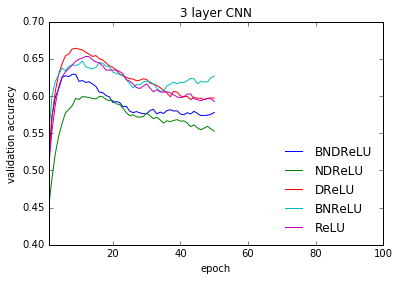

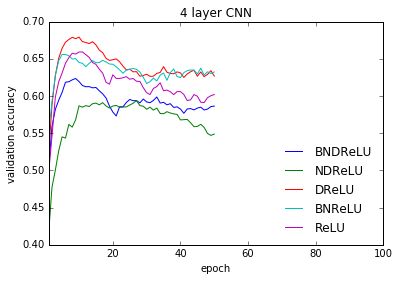

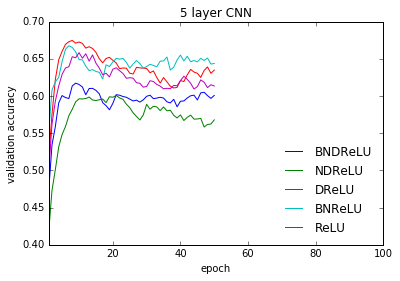

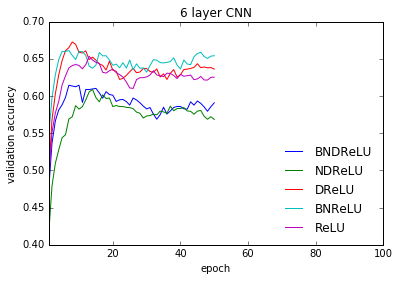

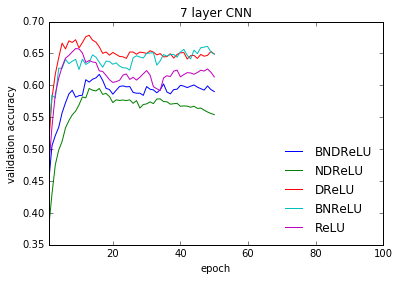

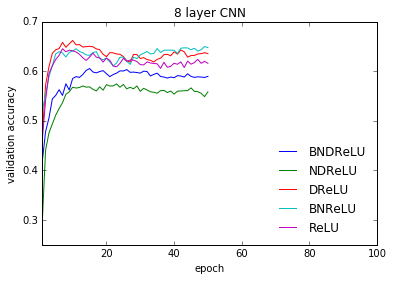

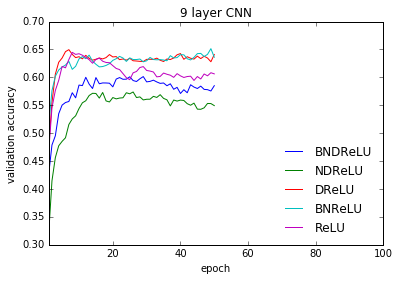

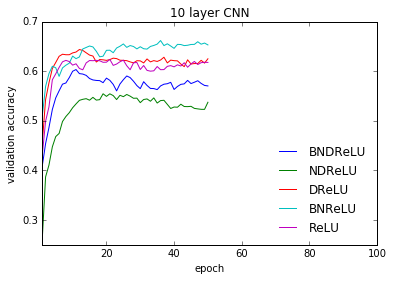

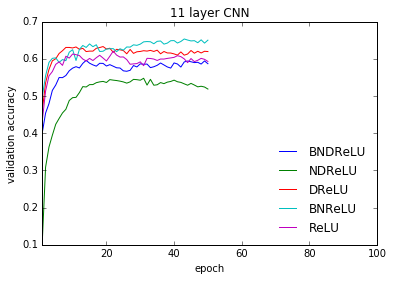

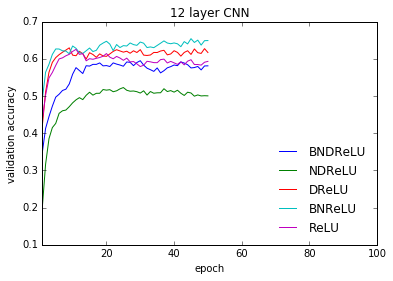

In [3]:
MAXIMUM_EPOCHS = 100
for i, history in enumerate(each_depth):
    pl.figure()
    pl.xlabel('epoch')
    pl.ylabel('validation accuracy')
    pl.title('%d layer CNN' % (i + 3))
    pl.xlim(1, MAXIMUM_EPOCHS)
    for key, value in history.items():
        pl.plot(range(1, len(value)), value[1:], label=key)
    pl.legend(framealpha=0, loc='lower right')